# Yuri Chaves
<a href="https://www.linkedin.com/in/yuri-chaves-330612214/" target="_blank">
<img src="https://cdn.jsdelivr.net/gh/devicons/devicon@latest/icons/linkedin/linkedin-original.svg" width="24" />
</a>
<br />
<a href="https://github.com/Yuri-Chaves" target="_blank">
<img src="https://cdn.jsdelivr.net/gh/devicons/devicon@latest/icons/github/github-original.svg" width="24" />
</a>

In [1]:
!git clone https://github.com/Yuri-Chaves/TransferLearning.git

Cloning into 'TransferLearning'...
remote: Enumerating objects: 204, done.
remote: Counting objects: 100% (204/204), done.
remote: Compressing objects: 100% (203/203), done.
remote: Total 204 (delta 0), reused 204 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (204/204), 26.50 MiB | 36.78 MiB/s, done.


In [7]:
%matplotlib inline

import os
import random
import numpy as np
import keras
import tensorflow as tf
import matplotlib.pyplot as plt

from matplotlib.pyplot import imshow
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Model, Sequential
from keras.layers import Activation, Conv2D, Dense, Dropout, Flatten, MaxPooling2D

In [26]:
root = '/content/TransferLearning/Dataset/'
exclude = ['BACKGROUND_Google', 'airplanes', 'Faces_easy', 'Faces']
trainSplit, valSplit = 0.7, 0.15
fileExtensions = ['.jpg', '.jpeg', '.png', '.webp']

In [23]:
class Colors:
    def __init__(self, red, green, yellow, blue, magenta, cyan, white, default):
        self.red = red
        self.green = green
        self.yellow = yellow
        self.blue = blue
        self.magenta = magenta
        self.cyan = cyan
        self.white = white
        self.default = default

colors = Colors(
    red="\x1b[31m",
    green="\x1b[32m",
    yellow="\x1b[33m",
    blue="\x1b[34m",
    magenta="\x1b[35m",
    cyan="\x1b[36m",
    white="\x1b[37m",
    default="\x1b[0m")
print(colors.magenta)

In [9]:
def filterImage(path):
  try:
    image = tf.io.read_file(path)
    image = tf.image.decode_image(image, channels=3)
    return True
  except:
    return False

validFiles = []
invalidFiles = 0

for root, dirs, files in os.walk(root):
  for file in files:
    path = os.path.join(root, file)
    if file.lower().endswith(('.jpg', '.jpeg', '.png', '.webp')) and filterImage(path):
      validFiles.append(path)
    else:
      invalidFiles += 1
      print(f'{colors.red}Invalid File:{colors.cyan} {path}')

print(f'{colors.red}Total Invalid Files = {invalidFiles}')
print(f'{colors.green}Total Valid Files = {len(validFiles)}{colors.default}')

Invalid File: /content/TransferLearning/Dataset/Motos/257355-1 (1).webp
Invalid File: /content/TransferLearning/Dataset/Motos/2023-ultra-limited-f95b-motorcycle.webp
Invalid File: /content/TransferLearning/Dataset/Motos/harley-davidson-fatbob-2.webp
Invalid File: /content/TransferLearning/Dataset/Motos/precos-tabela-indian-scout-bobber.webp
Invalid File: /content/TransferLearning/Dataset/Motos/TECFIL_SEO_IMAGENS_M7-1.webp
Invalid File: /content/TransferLearning/Dataset/Motos/perspectiva-lateral-da-moto-honda-adv-vermelho-perolizado-2024_12_11zon.webp
Invalid File: /content/TransferLearning/Dataset/Motos/moto-custom.webp
Invalid File: /content/TransferLearning/Dataset/Motos/NC750X.webp
Invalid File: /content/TransferLearning/Dataset/Motos/honda-biz-125-es-lateral-vermelho.webp
Invalid File: /content/TransferLearning/Dataset/Motos/25c31ffb0c1b8e6e90818f2ed9-e1663097520781.webp
Invalid File: /content/TransferLearning/Dataset/Motos/foto_model_730_1613.webp
Invalid File: /content/TransferLe

In [13]:
categories = [x[0] for x in os.walk(root) if x[0]][1:]
categories = [c for c in categories if c not in [os.path.join(root, e) for e in exclude]]

print(categories)

['/content/TransferLearning/Dataset/Motos', '/content/TransferLearning/Dataset/Carros']


In [14]:
def getImage(path):
  img = image.load_img(path, target_size=(224,224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  return img, x

In [15]:
data = []
for c, category in enumerate(categories):
  imgs = [os.path.join(dp, f) for dp, dn, filenames
          in os.walk(category) for f in filenames
          if os.path.splitext(f)[1].lower() in fileExtensions]
  for path in imgs:
    img, x = getImage(path)
    data.append({'x':np.array(x[0]), 'y':c})

totalClasses = len(categories)

In [16]:
random.shuffle(data)

In [17]:
idxVal = int(trainSplit * len(data))
idxTest = int((trainSplit + valSplit) * len(data))

train = data[:idxVal]
val = data[idxVal:idxTest]
test = data[idxTest:]

In [18]:
xTrain, yTrain = np.array([t["x"] for t in train]), [t["y"] for t in train]
xVal, yVal = np.array([t["x"] for t in val]), [t["y"] for t in val]
xTest, yTest = np.array([t["x"] for t in test]), [t["y"] for t in test]
print(yTest)

[1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1]


In [19]:
xTrain = xTrain.astype('float32') / 255.
xVal = xVal.astype('float32') / 255.
xTest = xTest.astype('float32') / 255.

yTrain = keras.utils.to_categorical(yTrain, totalClasses)
yVal = keras.utils.to_categorical(yVal, totalClasses)
yTest = keras.utils.to_categorical(yTest, totalClasses)

print(yTest.shape)

(31, 2)


In [25]:
print(f"{colors.magenta}train: {len(xTrain)}")
print(f"{colors.yellow}validation: {len(xVal)}")
print(f"{colors.white}test split: {len(xTest)}")
print(f"{colors.cyan}training data shape: {xTrain.shape}")
print(f"{colors.green}training labels shape: {yTrain.shape}")

train: 140
validation: 30
test split: 31
training data shape: (140, 224, 224, 3)
training labels shape: (140, 2)


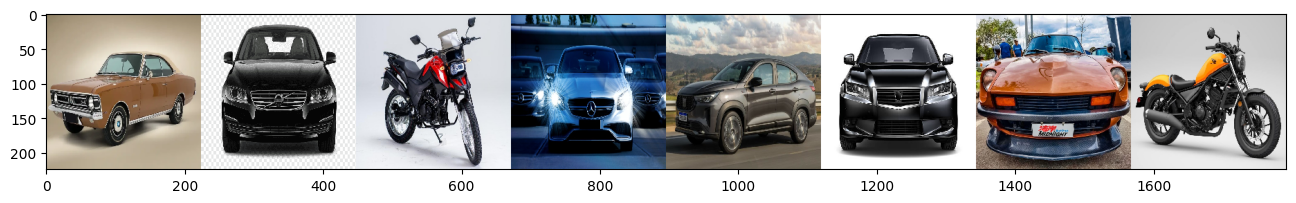

In [27]:
images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(root) for f in filenames if os.path.splitext(f)[1].lower() in fileExtensions]
idx = [int(len(images) * random.random()) for i in range(8)]
imgs = [image.load_img(images[i], target_size=(224, 224)) for i in idx]
concatImage = np.concatenate([np.asarray(img) for img in imgs], axis=1)
plt.figure(figsize=(16,4))
plt.imshow(concatImage)

In [29]:
model = Sequential()
print(f"{colors.yellow}Input Dimensions: {xTrain.shape[1:]}")

model.add(Conv2D(32, (3, 3), input_shape=xTrain.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(totalClasses))
model.add(Activation('softmax'))

model.summary()

Input Dimensions: (224, 224, 3)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 222, 222, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 109, 109, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 109, 109, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 52, 52, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 52, 52, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 26, 26, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 24, 24, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             514 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_11 (Activation)           │ (None, 2)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,209,058 (4.61 MB)

 Trainable params: 1,209,058 (4.61 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(xTrain, yTrain,
                    batch_size=128,
                    epochs=10,
                    validation_data=(xVal, yVal))

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.4948 - loss: 0.7124 - val_accuracy: 0.5000 - val_loss: 0.6625
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.5884 - loss: 0.6286 - val_accuracy: 0.5667 - val_loss: 0.6631
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.6274 - loss: 0.6342 - val_accuracy: 0.6333 - val_loss: 0.6269
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.7253 - loss: 0.5661 - val_accuracy: 0.6333 - val_loss: 0.6072
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.6963 - loss: 0.5824 - val_accuracy: 0.7000 - val_loss: 0.5730
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.7548 - loss: 0.5301 - val_accuracy: 0.8000 - val_loss: 0.5394
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.8089 - loss: 0.4794 - val_accuracy: 0.8000 - val_loss: 0.5290
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.7548 - loss: 0.4869 - val_accuracy: 0.8000 - val_loss: 0.5131
Epoch 9/

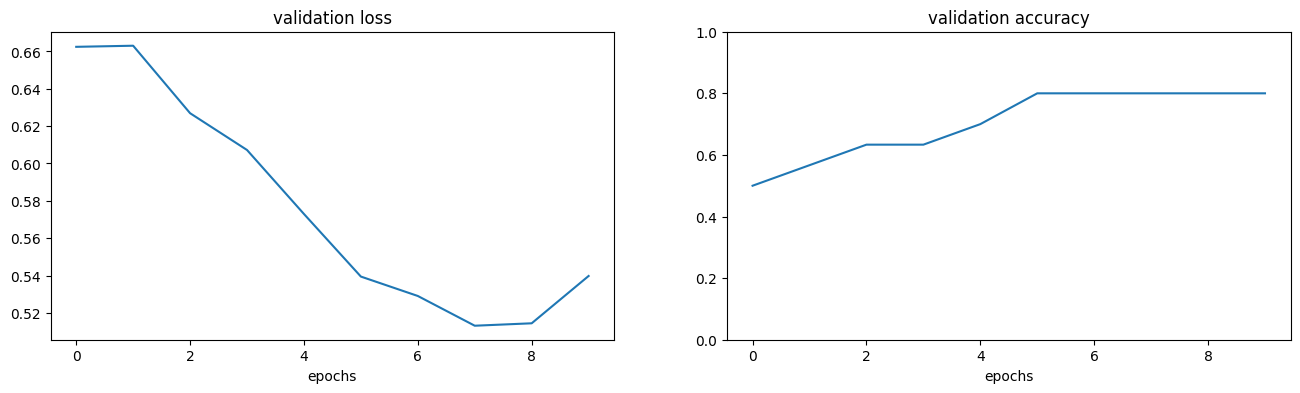

In [31]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(history.history["val_loss"])
ax.set_title("validation loss")
ax.set_xlabel("epochs")

ax2 = fig.add_subplot(122)
ax2.plot(history.history["val_accuracy"])
ax2.set_title("validation accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)

plt.show()

In [32]:
loss, accuracy = model.evaluate(xTest, yTest, verbose=0)
print(f'{colors.red}Test loss: {loss}')
print(f'{colors.green}Test accuracy: {accuracy}')

Test loss: 0.6069796681404114
Test accuracy: 0.7096773982048035


In [33]:
vgg = keras.applications.VGG16(weights='imagenet', include_top=True)
vgg.summary()

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
inp = vgg.input
newClassificationLayer = Dense(totalClasses, activation='softmax')
out = newClassificationLayer(vgg.layers[-2].output)
modelNew = Model(inp, out)

In [35]:
for l, layer in enumerate(modelNew.layers[:-1]):
    layer.trainable = False

for l, layer in enumerate(modelNew.layers[-1:]):
    layer.trainable = True

modelNew.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

modelNew.summary()

Model: "functional_40"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 134,268,738 (512.19 MB)

 Trainable params: 8,194 (32.01 KB)

 Non-trainable params: 134,260,544 (512.16 MB)

In [36]:
history2 = modelNew.fit(xTrain, yTrain,
                         batch_size=128,
                         epochs=10,
                         validation_data=(xVal, yVal))

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 130s 27s/step - accuracy: 0.5290 - loss: 1.3361 - val_accuracy: 0.4333 - val_loss: 2.2683
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 139s 27s/step - accuracy: 0.5126 - loss: 1.9287 - val_accuracy: 0.4333 - val_loss: 0.8677
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 134s 29s/step - accuracy: 0.5195 - loss: 0.7973 - val_accuracy: 0.5667 - val_loss: 1.1712
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 144s 31s/step - accuracy: 0.4874 - loss: 1.4029 - val_accuracy: 0.5667 - val_loss: 0.9460
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 143s 27s/step - accuracy: 0.4952 - loss: 1.0936 - val_accuracy: 0.7000 - val_loss: 0.5665
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 111s 27s/step - accuracy: 0.8510 - loss: 0.5299 - val_accuracy: 0.4333 - val_loss: 1.0841
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 138s 27s/step - accuracy: 0.5048 - loss: 0.8897 - val_accuracy: 0.4333 - val_loss: 0.8423
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 141s 26s/step - accuracy: 0.5195 - loss: 0.6579 - val_accuracy: 0.9333 - val_loss:

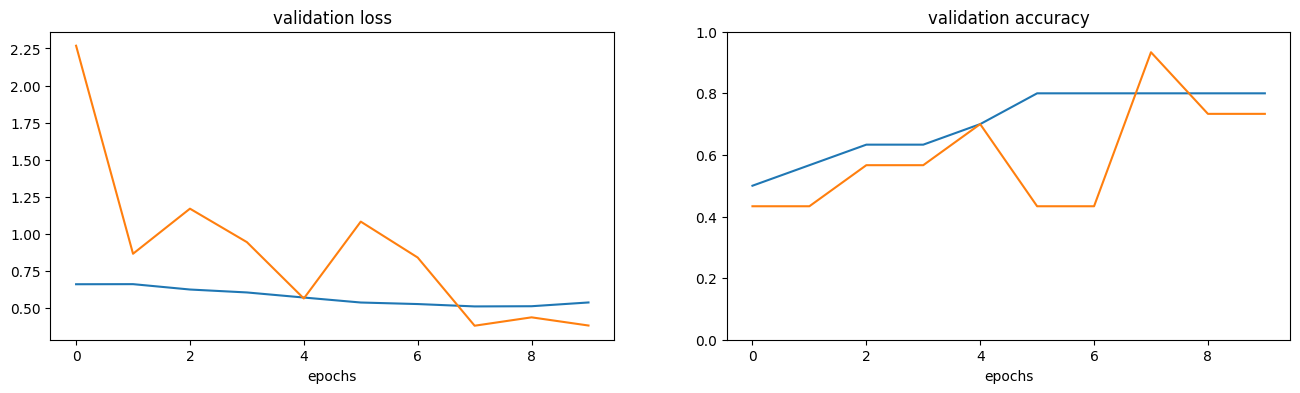

In [37]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(history.history["val_loss"])
ax.plot(history2.history["val_loss"])
ax.set_title("validation loss")
ax.set_xlabel("epochs")

ax2 = fig.add_subplot(122)
ax2.plot(history.history["val_accuracy"])
ax2.plot(history2.history["val_accuracy"])
ax2.set_title("validation accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)

plt.show()

In [38]:
loss, accuracy = modelNew.evaluate(xTest, yTest, verbose=0)
print(f'{colors.red}Test loss: {loss}')
print(f'{colors.green}Test accuracy: {accuracy}')

Test loss: 0.4863390028476715
Test accuracy: 0.6774193644523621


## Agora é hora de testar
- adicione uma imagem pressionando no botão:
image.png
- preencha a variável `imageName` com o nome da imagem
- Execute a próxima célula de código

## Now it's time to test
- Add an image by pressing: image.png
- Fill the variable `imageName` with the name of the image
- Run the next code Cell


In [39]:
imageName = 'moto-teste.jpg'
img, x = getImage(f'/content/{imageName}')
probabilities = modelNew.predict([x])
print(probabilities)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 745ms/step
[[0.99743986 0.00256014]]
